# Regresión Lineal: Coste de un incidente de seguridad

En este ejercicio se explican los fundamentos básicos de la regresión lineal aplicada a un caso de uso sencillo relacionado con la Ciberseguridad.

## Enunciado del ejercicio

El ejercicio consiste en predecir el coste de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria.

### 1. Generación del conjunto de datos

In [11]:
import numpy as np
# generación de un conjunto da datos con relación  lineal
X = 2 * np.random.rand(100, 1) # lista de listas
y = 4 + 3 * X + np.random.randn(100, 1)

print("La longitud del conjunto de datos es:", len(X))

La longitud del conjunto de datos es: 100


### 2. Visualización del conjunto de datos

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

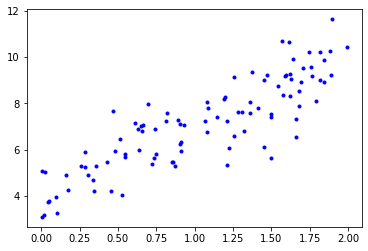

In [6]:
plt.plot(X, y, "b.") # color blue
plt.show() # correlación lineal, tendencia creciente

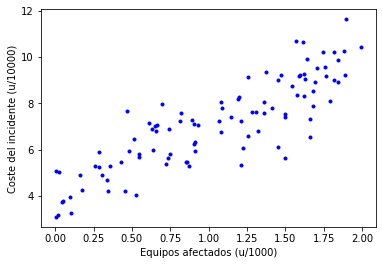

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Coste del incidente (u/10000)")
plt.show()

### 3. Modificación del conjunto de datos

In [7]:
import pandas as pd

In [12]:
data = {'n_equipos_afectados': X.flatten(), 'coste': y.flatten()} # flatten colapsa todo en una dimensión
df = pd.DataFrame(data)
df.head(10)

,n_equipos_afectados,coste
0,0.372541,6.263338
1,0.450120,3.819732
2,0.634796,6.033844
3,0.759918,5.815357
4,0.380260,5.588713
5,0.620339,4.898264
6,0.732642,4.789289
7,0.460489,4.960810
8,1.038650,8.304412
9,1.791974,8.423568


In [13]:
# Escalado del número de equipos afectados. Si tuvieramos más de dos variables se debería noramlizar las variables para la interpretabilidad de los betas.
# Si no podría derivar en problemas con los test de hipótesis.
df['n_equipos_afectados'] = df['n_equipos_afectados'] * 1000
df['n_equipos_afectados'] = df['n_equipos_afectados'].astype('int')
# Escalado del coste
df['coste'] = df['coste'] * 10000
df['coste'] = df['coste'].astype('int')
df.head(10)

,n_equipos_afectados,coste
0,372,62633
1,450,38197
2,634,60338
3,759,58153
4,380,55887
5,620,48982
6,732,47892
7,460,49608
8,1038,83044
9,1791,84235


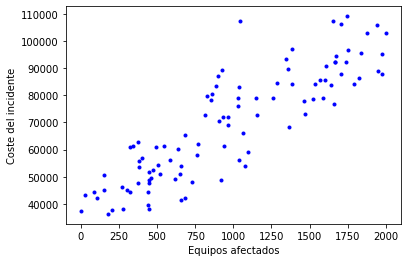

In [14]:
# Representación gráfica del conjunto de datos
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

### 4. Construcción del modelo

In [15]:
from sklearn.linear_model import LinearRegression

Esto es una simplificación, faltaría realizar un shuffle y crear los datos de train y test.

In [16]:
# Construcción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression() # instanciar: generar un objeto para el modelo
lin_reg.fit(df['n_equipos_afectados'].values.reshape(-1, 1), df['coste'].values) # .fit para referirse al entrenamiento, al ajuste.
# reshape porque el primer parámetro debe ser una matriz, .values para se convierta de un pd.series a un array.

LinearRegression()

In [17]:
# Parámetro theta 0
lin_reg.intercept_ # el _ suele significar que es un valor que no cambiamos nosotros si no que varía con el modelo.

38925.14366608673

In [18]:
# Parámetro theta 1
lin_reg.coef_

array([31.12202612])

Y = 37328.14 + 30.22*X

In [19]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[df["n_equipos_afectados"].min()], [df["n_equipos_afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

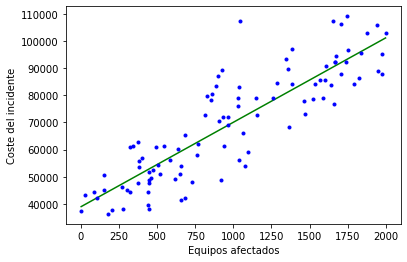

In [20]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

### 5. Predicción de nuevos ejemplos

In [21]:
x_new = np.array([[1300]]) # 1300 equipos afectados

# Predicción del coste que tendría el incidente
coste = lin_reg.predict(x_new) 

print("El coste del incidente sería:", int(coste[0]), "€")

El coste del incidente sería: 79383 €


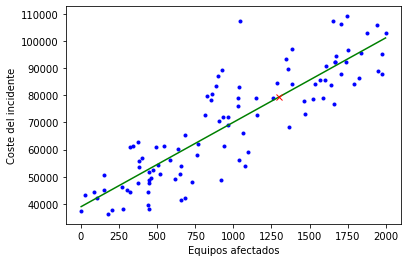

In [24]:
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, coste, "rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()